In [1]:
!pip install mne
!pip install numpy matplotlib pywavelets mne
!pip install numpy mne matplotlib scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy.signal import detrend
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy.signal import detrend

In [16]:
path = cleaned_path = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN001.edf"
path2 = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/sleep_data/recordings/SN001_sleepscoring.txt"
# EDF 파일 로드
raw = mne.io.read_raw_edf(path, preload=True)


Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2564999  =      0.000 ... 25649.990 secs...


In [17]:
channel_types = {
    raw.ch_names[0]: 'eeg',  # 인덱스 0
    raw.ch_names[1]: 'eeg',  # 인덱스 1
    raw.ch_names[2]: 'eeg',  # 인덱스 2
    raw.ch_names[3]: 'eeg',  # 인덱스 3
    raw.ch_names[4]: 'emg',  # 인덱스 4, EMG chin
    raw.ch_names[5]: 'eog',  # 인덱스 5, EOG
    raw.ch_names[6]: 'eog',  # 인덱스 6, EOG
    raw.ch_names[7]: 'ecg'   # 인덱스 7, ECG
}

# 채널 타입 설정
raw.set_channel_types(channel_types)

# EMG chin 신호 추출
emg_chin = raw.copy().pick_channels(['EMG chin'])

# EMG 신호 데이터 추출
actual_emg_signal = emg_chin.get_data()[0]  # EMG 데이터 배열

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [18]:
# 수면 단계 데이터 로드 (30초 단위로 기록된 수면 단계)
with open(path2, 'r') as file:
    lines = file.readlines()[1:]  # 첫 번째 행을 건너뛰고 나머지를 읽음

# 'Lights off'와 'Lights on' 항목을 제외한 수면 단계 추출
sleep_stages = []
for line in lines:
    if 'Lights off' not in line and 'Lights on' not in line:
        stage = line.split(',')[4].strip()
        sleep_stages.append(stage)

# 샘플링 레이트 설정
new_sampling_rate = 100

# RMS 계산 함수
def calculate_rms(signal):
    return np.sqrt(np.mean(signal**2))

# 전체 EMG 신호에 대한 RMS 값 계산
total_rms = calculate_rms(actual_emg_signal)

# R 단계로 매핑된 RMS 값 계산
stage_duration_sec = 30  # 각 수면 단계의 지속 시간 (초)
stage_sample_count = stage_duration_sec * new_sampling_rate

# R 단계의 RMS 값 계산
rms_r_stage_values = []
for i, stage in enumerate(sleep_stages):
    if stage == 'Sleep stage R':
        start_idx = i * stage_sample_count
        end_idx = (i + 1) * stage_sample_count
        if end_idx <= len(actual_emg_signal):
            r_stage_signal = actual_emg_signal[start_idx:end_idx]
            rms_r_stage_values.append(calculate_rms(r_stage_signal))

# R 단계 RMS 값의 평균 계산
average_r_stage_rms = np.mean(rms_r_stage_values)

print(f"전체 데이터에 대한 RMS 값: {total_rms}")
print(f"R 단계에 대한 RMS 값의 평균: {average_r_stage_rms}")

전체 데이터에 대한 RMS 값: 1.755598120201873e-11
R 단계에 대한 RMS 값의 평균: 1.7569255043229868e-11


In [19]:
# 전체 EMG 신호 및 R 단계의 RMS 값 시각화
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

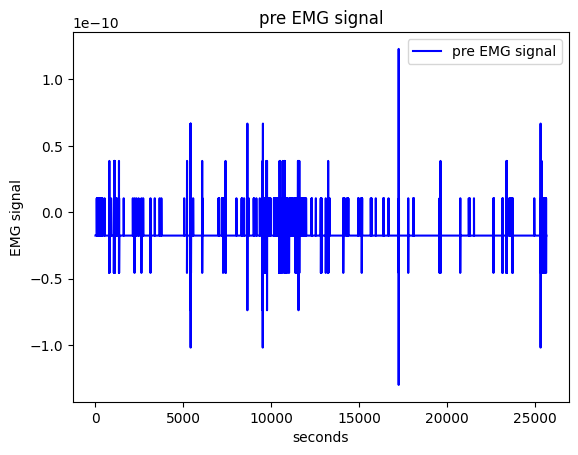

In [20]:
# 원본 EMG 신호 플롯
times = np.arange(len(actual_emg_signal)) / new_sampling_rate
plt.plot(times, actual_emg_signal, label='pre EMG signal', color='blue')
plt.xlabel('seconds')
plt.ylabel('EMG signal')
plt.title('pre EMG signal')

plt.legend()
plt.show()

---
---
---


Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2564999  =      0.000 ... 25649.990 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
전체 데이터에 대한 RMS 값: 1.755598120201873e-11
R 단계에 대한 RMS 값의 평균: 1.7569255043229868e-11


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

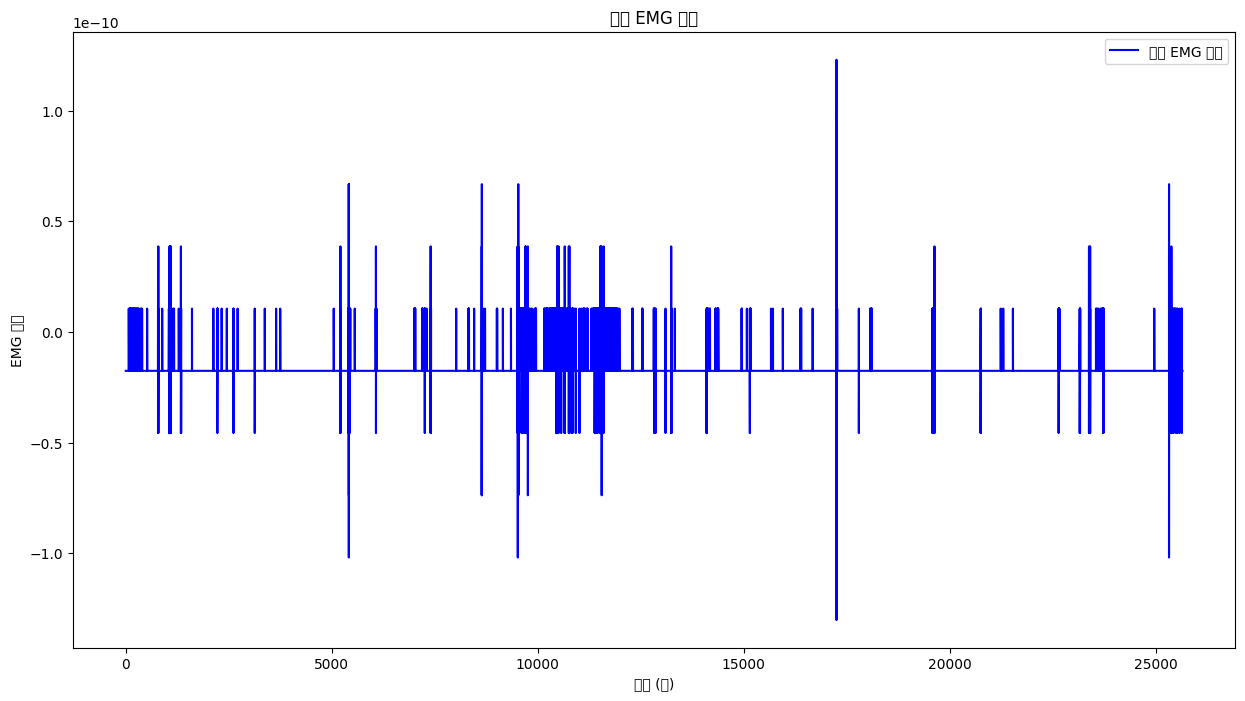

In [15]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# 데이터 파일 경로
path = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN001.edf"
path2 = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/sleep_data/recordings/SN001_sleepscoring.txt"

# EDF 파일 로드
raw = mne.io.read_raw_edf(path, preload=True)

# 채널 타입 설정
channel_types = {
    raw.ch_names[0]: 'eeg',  # 인덱스 0
    raw.ch_names[1]: 'eeg',  # 인덱스 1
    raw.ch_names[2]: 'eeg',  # 인덱스 2
    raw.ch_names[3]: 'eeg',  # 인덱스 3
    raw.ch_names[4]: 'emg',  # 인덱스 4, EMG chin
    raw.ch_names[5]: 'eog',  # 인덱스 5, EOG
    raw.ch_names[6]: 'eog',  # 인덱스 6, EOG
    raw.ch_names[7]: 'ecg'   # 인덱스 7, ECG
}

# 채널 타입 설정
raw.set_channel_types(channel_types)

# EMG chin 신호 추출
emg_chin = raw.copy().pick_channels(['EMG chin'])

# EMG 신호 데이터 추출
actual_emg_signal = emg_chin.get_data()[0]  # EMG 데이터 배열

# 수면 단계 데이터 로드 (30초 단위로 기록된 수면 단계)
with open(path2, 'r') as file:
    lines = file.readlines()[1:]  # 첫 번째 행을 건너뛰고 나머지를 읽음

# 'Lights off'와 'Lights on' 항목을 제외한 수면 단계 추출
sleep_stages = []
for line in lines:
    if 'Lights off' not in line and 'Lights on' not in line:
        stage = line.split(',')[4].strip()
        sleep_stages.append(stage)

# 샘플링 레이트 설정
new_sampling_rate = 100

# RMS 계산 함수
def calculate_rms(signal):
    return np.sqrt(np.mean(signal**2))

# 전체 EMG 신호에 대한 RMS 값 계산
total_rms = calculate_rms(actual_emg_signal)

# R 단계로 매핑된 RMS 값 계산
stage_duration_sec = 30  # 각 수면 단계의 지속 시간 (초)
stage_sample_count = stage_duration_sec * new_sampling_rate

# R 단계의 RMS 값 계산
rms_r_stage_values = []
for i, stage in enumerate(sleep_stages):
    if stage == 'Sleep stage R':
        start_idx = i * stage_sample_count
        end_idx = (i + 1) * stage_sample_count
        if end_idx <= len(actual_emg_signal):
            r_stage_signal = actual_emg_signal[start_idx:end_idx]
            rms_r_stage_values.append(calculate_rms(r_stage_signal))

# R 단계 RMS 값의 평균 계산
average_r_stage_rms = np.mean(rms_r_stage_values)

print(f"전체 데이터에 대한 RMS 값: {total_rms}")
print(f"R 단계에 대한 RMS 값의 평균: {average_r_stage_rms}")

# 전체 EMG 신호 및 R 단계의 RMS 값 시각화
plt.figure(figsize=(15, 8))

# 원본 EMG 신호 플롯
times = np.arange(len(actual_emg_signal)) / new_sampling_rate
plt.plot(times, actual_emg_signal, label='원본 EMG 신호', color='blue')
plt.xlabel('시간 (초)')
plt.ylabel('EMG 신호')
plt.title('원본 EMG 신호')

plt.legend()
plt.show()


---
---
---

In [22]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
raw_path = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev"
scoring_path = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/sleep_data/recordings"

# RMS 계산 함수
def calculate_rms(signal):
    return np.sqrt(np.mean(signal**2))

# EDF 파일과 수면 단계 파일을 처리하는 함수
def preprocess_psg(idx):
    # 파일 경로 설정
    file_edf = os.path.join(raw_path, f"pre_SN{idx}.edf")
    file_txt = os.path.join(scoring_path, f"SN{idx}_sleepscoring.txt")

    if not os.path.exists(file_edf) or not os.path.exists(file_txt):
        return None, None

    # EDF 파일 로드
    raw = mne.io.read_raw_edf(file_edf, preload=True)

    # 채널 타입 설정
    channel_types = {
        raw.ch_names[0]: 'eeg',  # 인덱스 0
        raw.ch_names[1]: 'eeg',  # 인덱스 1
        raw.ch_names[2]: 'eeg',  # 인덱스 2
        raw.ch_names[3]: 'eeg',  # 인덱스 3
        raw.ch_names[4]: 'emg',  # 인덱스 4, EMG chin
        raw.ch_names[5]: 'eog',  # 인덱스 5, EOG
        raw.ch_names[6]: 'eog',  # 인덱스 6, EOG
        raw.ch_names[7]: 'ecg'   # 인덱스 7, ECG
    }
    raw.set_channel_types(channel_types)

    # EMG chin 신호 추출
    emg_chin = raw.copy().pick_channels(['EMG chin'])
    actual_emg_signal = emg_chin.get_data()[0]  # EMG 데이터 배열

    # 수면 단계 데이터 로드 (30초 단위로 기록된 수면 단계)
    with open(file_txt, 'r') as file:
        lines = file.readlines()[1:]  # 첫 번째 행을 건너뛰고 나머지를 읽음

    # 'Lights off'와 'Lights on' 항목을 제외한 수면 단계 추출
    sleep_stages = []
    for line in lines:
        if 'Lights off' not in line and 'Lights on' not in line:
            stage = line.split(',')[4].strip()
            sleep_stages.append(stage)

    # R 단계로 매핑된 RMS 값 계산
    stage_duration_sec = 30  # 각 수면 단계의 지속 시간 (초)
    new_sampling_rate = int(emg_chin.info['sfreq'])
    stage_sample_count = stage_duration_sec * new_sampling_rate

    # R 단계의 RMS 값 계산
    rms_r_stage_values = []
    for i, stage in enumerate(sleep_stages):
        if stage == 'Sleep stage R':
            start_idx = i * stage_sample_count
            end_idx = (i + 1) * stage_sample_count
            if end_idx <= len(actual_emg_signal):
                r_stage_signal = actual_emg_signal[start_idx:end_idx]
                rms_r_stage_values.append(calculate_rms(r_stage_signal))

    # 전체 RMS 값과 R 단계의 RMS 값의 평균 반환
    total_rms = calculate_rms(actual_emg_signal)
    average_r_stage_rms = np.mean(rms_r_stage_values) if rms_r_stage_values else None

    return total_rms, average_r_stage_rms

# 모든 파일에 대해 전처리 실행
all_rms_values = []
all_r_stage_rms_values = []
missing_files = []

for i in range(1, 155):  # 1부터 154까지 반복
    idx = str(i).zfill(3)
    total_rms, r_stage_rms = preprocess_psg(idx)
    if total_rms is not None and r_stage_rms is not None:
        all_rms_values.append(total_rms)
        all_r_stage_rms_values.append(r_stage_rms)
    else:
        missing_files.append(idx)
        print(f"File SN{idx}.edf or scoring file not found")

Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2564999  =      0.000 ... 25649.990 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2569299  =      0.000 ... 25692.990 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2863599  =      0.000 ... 28635.990 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /co

전체 데이터의 R 단계에 대한 RMS 값의 평균: 4.873666532431782e-11


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

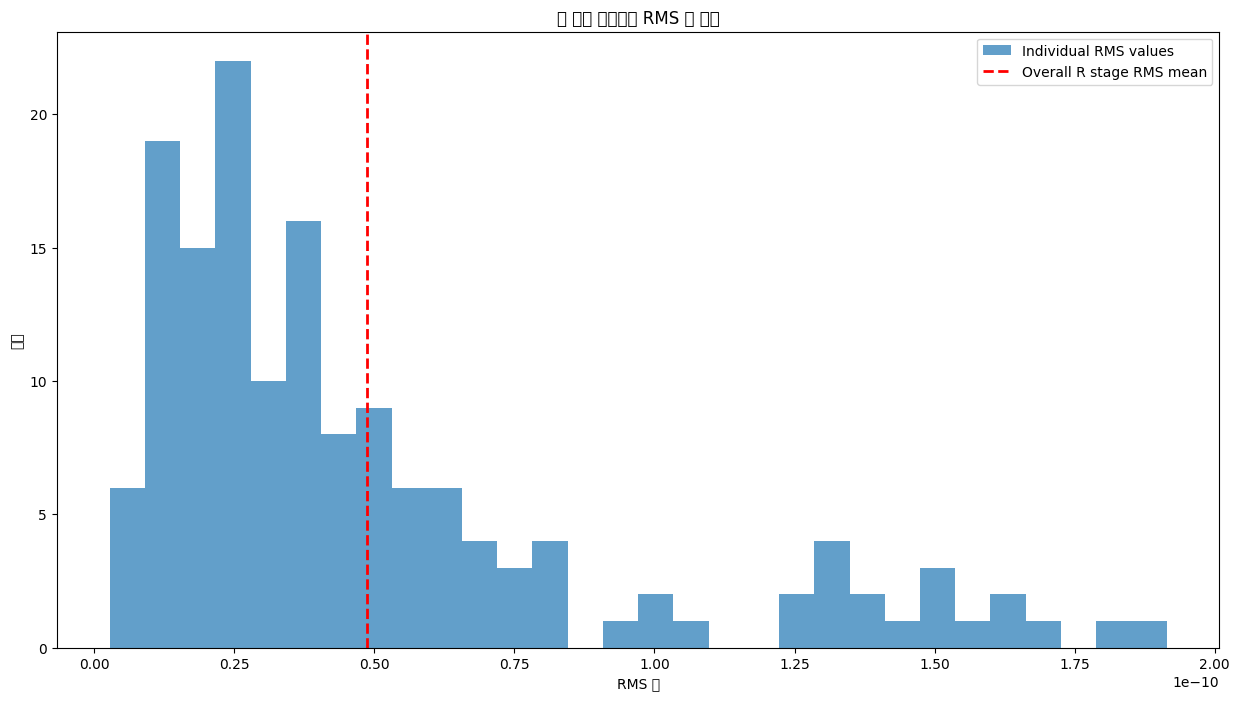

In [23]:
# R 단계의 전체 RMS 평균 계산
overall_average_r_stage_rms = np.mean([r for r in all_r_stage_rms_values if r is not None])
print(f"전체 데이터의 R 단계에 대한 RMS 값의 평균: {overall_average_r_stage_rms}")

# 각 개별 파일의 RMS 값을 분포로 시각화
plt.figure(figsize=(15, 8))
plt.hist(all_rms_values, bins=30, alpha=0.7, label='Individual RMS values')
plt.axvline(overall_average_r_stage_rms, color='red', linestyle='dashed', linewidth=2, label='Overall R stage RMS mean')
plt.xlabel('RMS 값')
plt.ylabel('빈도')
plt.title('각 개별 데이터의 RMS 값 분포')
plt.legend()
plt.show()

---
---
---

In [30]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt

# 데이터 파일 경로 설정
raw_path = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev"
scoring_path = "/content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/sleep_data/recordings"

# RMS 계산 함수
def calculate_rms(signal):
    return np.sqrt(np.mean(signal**2))

# EDF 파일과 수면 단계 파일을 처리하는 함수
def preprocess_psg(idx):
    # 파일 경로 설정
    file_edf = os.path.join(raw_path, f"pre_SN{idx}.edf")
    file_txt = os.path.join(scoring_path, f"SN{idx}_sleepscoring.txt")

    if not os.path.exists(file_edf) or not os.path.exists(file_txt):
        return None, None, None, None

    # EDF 파일 로드
    raw = mne.io.read_raw_edf(file_edf, preload=True)

    # 채널 타입 설정
    channel_types = {
        raw.ch_names[0]: 'eeg',  # 인덱스 0
        raw.ch_names[1]: 'eeg',  # 인덱스 1
        raw.ch_names[2]: 'eeg',  # 인덱스 2
        raw.ch_names[3]: 'eeg',  # 인덱스 3
        raw.ch_names[4]: 'emg',  # 인덱스 4, EMG chin
        raw.ch_names[5]: 'eog',  # 인덱스 5, EOG
        raw.ch_names[6]: 'eog',  # 인덱스 6, EOG
        raw.ch_names[7]: 'ecg'   # 인덱스 7, ECG
    }
    raw.set_channel_types(channel_types)

    # EMG chin 신호 추출
    emg_chin = raw.copy().pick_channels(['EMG chin'])
    actual_emg_signal = emg_chin.get_data()[0]  # EMG 데이터 배열

    # 수면 단계 데이터 로드 (30초 단위로 기록된 수면 단계)
    with open(file_txt, 'r') as file:
        lines = file.readlines()[1:]  # 첫 번째 행을 건너뛰고 나머지를 읽음

    # 'Lights off'와 'Lights on' 항목을 제외한 수면 단계 추출
    sleep_stages = []
    for line in lines:
        if 'Lights off' not in line and 'Lights on' not in line:
            stage = line.split(',')[4].strip()
            sleep_stages.append(stage)

    # RMS 값 계산
    stage_duration_sec = 30  # 각 수면 단계의 지속 시간 (초)
    new_sampling_rate = int(emg_chin.info['sfreq'])
    stage_sample_count = stage_duration_sec * new_sampling_rate

    # 각 수면 단계의 RMS 값 계산
    rms_values = {'R': [], 'W': [], 'N1': [], 'N2': [], 'N3': []}
    for i, stage in enumerate(sleep_stages):
        start_idx = i * stage_sample_count
        end_idx = (i + 1) * stage_sample_count
        if end_idx <= len(actual_emg_signal):
            stage_signal = actual_emg_signal[start_idx:end_idx]
            rms_value = calculate_rms(stage_signal)
            if stage == 'Sleep stage R':
                rms_values['R'].append(rms_value)
            elif stage == 'Sleep stage W':
                rms_values['W'].append(rms_value)
            elif stage == 'Sleep stage N1':
                rms_values['N1'].append(rms_value)
            elif stage == 'Sleep stage N2':
                rms_values['N2'].append(rms_value)
            elif stage == 'Sleep stage N3':
                rms_values['N3'].append(rms_value)

    total_rms = calculate_rms(actual_emg_signal)
    average_r_stage_rms = np.mean(rms_values['R']) if rms_values['R'] else None

    return total_rms, average_r_stage_rms, rms_values, sleep_stages

# 모든 파일에 대해 전처리 실행
all_rms_values = []
all_r_stage_rms_values = []
all_stage_rms_values = {'R': [], 'W': [], 'N1': [], 'N2': [], 'N3': []}
missing_files = []

for i in range(1, 155):  # 1부터 154까지 반복
    idx = str(i).zfill(3)
    total_rms, r_stage_rms, stage_rms, sleep_stages = preprocess_psg(idx)
    if total_rms is not None and r_stage_rms is not None:
        all_rms_values.append(total_rms)
        all_r_stage_rms_values.append(r_stage_rms)
        for key in all_stage_rms_values:
            all_stage_rms_values[key].extend(stage_rms[key])
    else:
        missing_files.append(idx)
        print(f"File SN{idx}.edf or scoring file not found")

Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2564999  =      0.000 ... 25649.990 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2569299  =      0.000 ... 25692.990 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /content/drive/MyDrive/데캡디(딥슬립딥드림)공유문서함/DATA/Pre_rev/pre_SN003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2863599  =      0.000 ... 28635.990 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /co

In [31]:
# 전체 데이터의 모든 수면 단계에 대한 RMS 값의 평균 계산
mean_rms_values = {key: np.mean(values) for key, values in all_stage_rms_values.items() if values}

print(f"전체 데이터의 수면 단계별 RMS 값의 평균: {mean_rms_values}")

# 전체 데이터의 R 단계 RMS 값의 평균 계산
overall_average_r_stage_rms = np.mean(all_r_stage_rms_values)
print(f"전체 데이터의 R 단계에 대한 RMS 값의 평균: {overall_average_r_stage_rms}")

# 전체 데이터의 RMS 값의 평균 계산
overall_average_rms = np.mean(all_rms_values)
print(f"전체 데이터의 RMS 값의 평균: {overall_average_rms}")

# 각 개별 파일의 R 단계 RMS 값에 대한 특징 설명 생성
features = []
for idx in range(1, 155):
    idx_str = str(idx).zfill(3)
    if idx_str not in missing_files and idx <= len(all_r_stage_rms_values):
        r_stage_rms = all_r_stage_rms_values[idx - 1]
        total_rms = all_rms_values[idx - 1]

        if r_stage_rms > overall_average_r_stage_rms:
            features.append(f"데이터 SN{idx_str}의 R 단계 RMS 값은 전체 데이터의 평균 R 단계 RMS 값보다 높습니다. 이는 이 데이터가 R 단계에서 더 큰 근육 활동을 나타낼 수 있음을 의미합니다.")
        else:
            features.append(f"데이터 SN{idx_str}의 R 단계 RMS 값은 전체 데이터의 평균 R 단계 RMS 값보다 낮습니다. 이는 이 데이터가 R 단계에서 더 적은 근육 활동을 나타낼 수 있음을 의미합니다.")

        if r_stage_rms > overall_average_rms:
            features.append(f"데이터 SN{idx_str}의 R 단계 RMS 값은 전체 데이터의 RMS 값의 평균보다 높습니다.")
        else:
            features.append(f"데이터 SN{idx_str}의 R 단계 RMS 값은 전체 데이터의 RMS 값의 평균보다 낮습니다.")

        for key in mean_rms_values:
            if r_stage_rms > mean_rms_values[key]:
                features.append(f"데이터 SN{idx_str}의 R 단계 RMS 값은 전체 데이터의 {key} 단계의 평균 RMS 값보다 높습니다.")
            else:
                features.append(f"데이터 SN{idx_str}의 R 단계 RMS 값은 전체 데이터의 {key} 단계의 평균 RMS 값보다 낮습니다.")

for feature in features:
    print(feature)


전체 데이터의 수면 단계별 RMS 값의 평균: {'R': 4.998127574600191e-11, 'W': 5.162529689368743e-11, 'N1': 5.120199824930231e-11, 'N2': 4.868210440179206e-11, 'N3': 5.064406122965411e-11}
전체 데이터의 R 단계에 대한 RMS 값의 평균: 4.873666532431782e-11
전체 데이터의 RMS 값의 평균: 4.959216354580652e-11
데이터 SN001의 R 단계 RMS 값은 전체 데이터의 평균 R 단계 RMS 값보다 낮습니다. 이는 이 데이터가 R 단계에서 더 적은 근육 활동을 나타낼 수 있음을 의미합니다.
데이터 SN001의 R 단계 RMS 값은 전체 데이터의 RMS 값의 평균보다 낮습니다.
데이터 SN001의 R 단계 RMS 값은 전체 데이터의 R 단계의 평균 RMS 값보다 낮습니다.
데이터 SN001의 R 단계 RMS 값은 전체 데이터의 W 단계의 평균 RMS 값보다 낮습니다.
데이터 SN001의 R 단계 RMS 값은 전체 데이터의 N1 단계의 평균 RMS 값보다 낮습니다.
데이터 SN001의 R 단계 RMS 값은 전체 데이터의 N2 단계의 평균 RMS 값보다 낮습니다.
데이터 SN001의 R 단계 RMS 값은 전체 데이터의 N3 단계의 평균 RMS 값보다 낮습니다.
데이터 SN002의 R 단계 RMS 값은 전체 데이터의 평균 R 단계 RMS 값보다 낮습니다. 이는 이 데이터가 R 단계에서 더 적은 근육 활동을 나타낼 수 있음을 의미합니다.
데이터 SN002의 R 단계 RMS 값은 전체 데이터의 RMS 값의 평균보다 낮습니다.
데이터 SN002의 R 단계 RMS 값은 전체 데이터의 R 단계의 평균 RMS 값보다 낮습니다.
데이터 SN002의 R 단계 RMS 값은 전체 데이터의 W 단계의 평균 RMS 값보다 낮습니다.
데이터 SN002의 R 단계 RMS 값은 전체 데이터의 N1 단계의 평균 RMS 값보다 낮습니다.
데이터 SN0

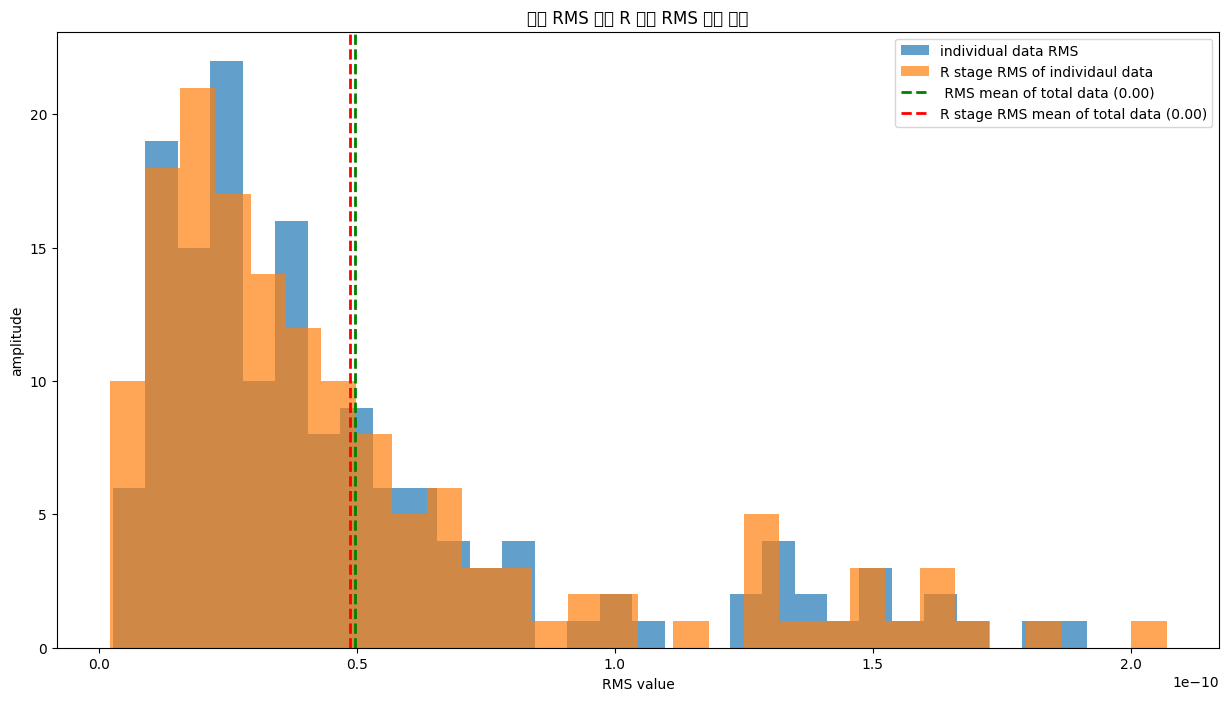

누락된 파일들: ['014', '064', '112', '135']


In [33]:
# 전체 RMS 값 및 수면 단계별 RMS 값 시각화
plt.figure(figsize=(15, 8))

# 전체 RMS 값과 R 단계 RMS 값을 비교
plt.hist(all_rms_values, bins=30, alpha=0.7, label='individual data RMS')
plt.hist(all_r_stage_rms_values, bins=30, alpha=0.7, label='R stage RMS of individaul data')
plt.axvline(overall_average_rms, color='green', linestyle='dashed', linewidth=2, label=f' RMS mean of total data ({overall_average_rms:.2f})')
plt.axvline(overall_average_r_stage_rms, color='red', linestyle='dashed', linewidth=2, label=f'R stage RMS mean of total data ({overall_average_r_stage_rms:.2f})')
plt.xlabel('RMS value')
plt.ylabel('amplitude')
plt.title('전체 RMS 값과 R 단계 RMS 값의 비교')
plt.legend()
plt.show()

print(f"누락된 파일들: {missing_files}")